<a href="https://colab.research.google.com/github/MiteshBhula/AI-ML-Projects/blob/main/Mitesh_Bhula_SLC_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Importing libraries that will be used.
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# libraries used to build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer

## Loading the dataset

In [ ]:
# Reading the data set
data = pd.read_csv("/content/Loan_Modelling.csv")

In [ ]:
# Creating a copy of the data set
cdata = data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Finding the shape of the data
print(f"There are {cdata.shape[0]} rows and {cdata.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [ ]:
# Viewing the top 5 rows within the data
cdata.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Viewing the last 5 rows within the data
cdata.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# Viewing the statistical summary of the data set.
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Checking each data type for each column within the data set
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The experience column contains negative values, this could be imputed to equal zero.

In [ ]:
# Checking for any null values within the data
cdata.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values in the data

In [ ]:
# Dropping the ID column from the dataset.
cdata.drop(columns=['ID'], inplace=True)

In [ ]:
# Mapping the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
cdata["Education"].replace(1, "Undergraduate", inplace=True)
cdata["Education"].replace(2, "Graduate", inplace=True)
cdata["Education"].replace(3, "Professional", inplace=True)

In [ ]:
# Replacing all negative values for experience to their positive absolute value
# checking if experience <0
cdata[cdata["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

-1, -2 and -3 are negative values within the experience column. These will be changed to positive values.

In [ ]:
# Correcting the experience values
cdata["Experience"].replace(-1, 1, inplace=True)
cdata["Experience"].replace(-2, 2, inplace=True)
cdata["Experience"].replace(-3, 3, inplace=True)

In [ ]:
# Identifying each unique zip code in the data set
cdata["ZIPCode"].nunique()

467

There are 467 unique zip codes in the data set.

In [ ]:
# Creating category data types for categorical columns
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
cdata[cat_cols] = cdata[cat_cols].astype("category")

In [ ]:
# Checking new data types for each column in the data set
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 294.1 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# Method to create histogram and boxplot diagrams
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

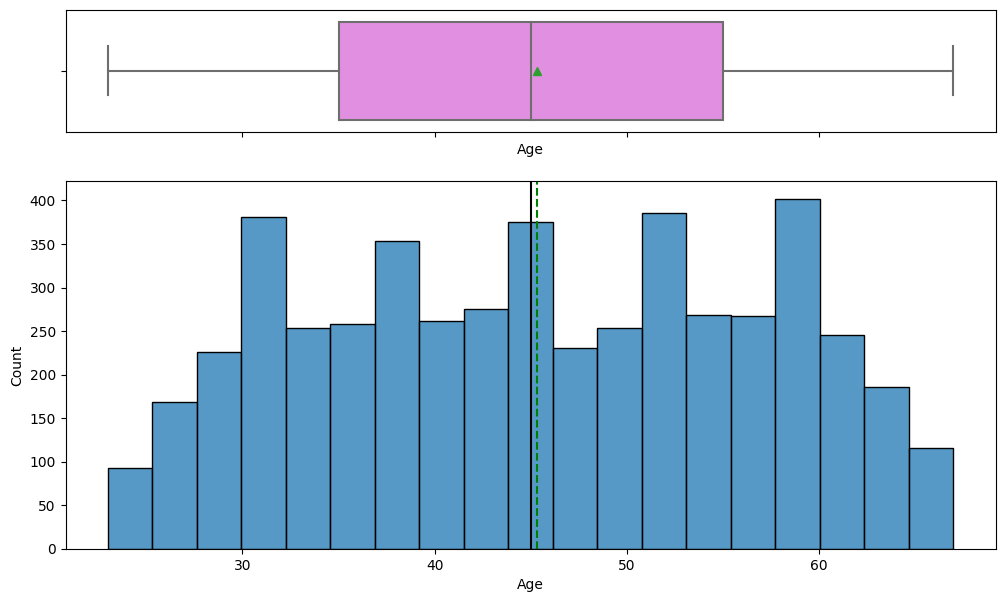

In [ ]:
# Distribution of age within the data set
histogram_boxplot(cdata, 'Age')

The age of the banks customers looks to be normally distributed.

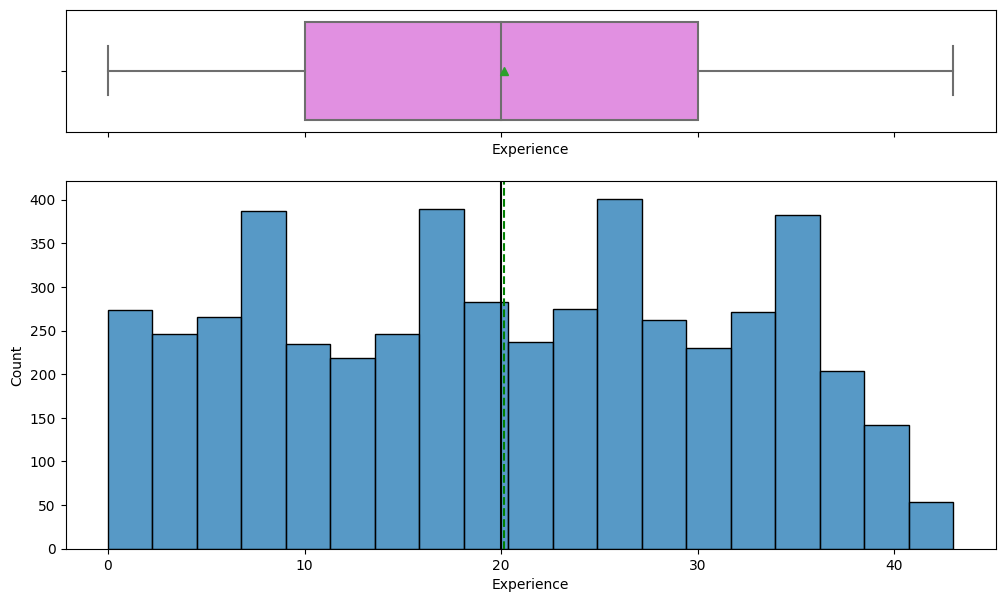

In [ ]:
# diagram depicting the distribution of exerience within the data set
histogram_boxplot(cdata, 'Experience')

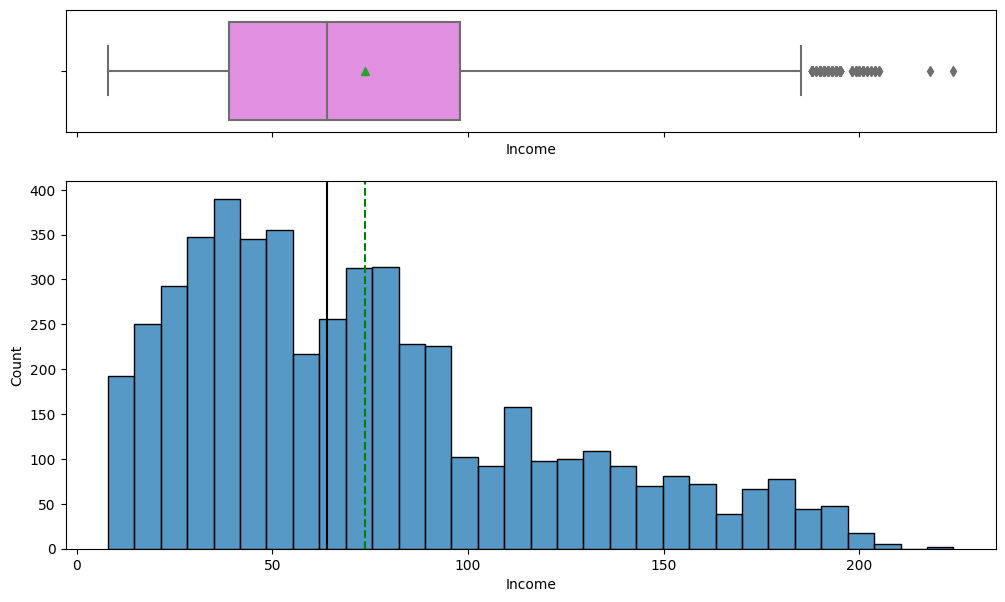

In [ ]:
# diagram depicting the distribution of Income within the data set
histogram_boxplot(cdata, 'Income')

The income of clients that use this bank is right-skewed and contains many outliers.

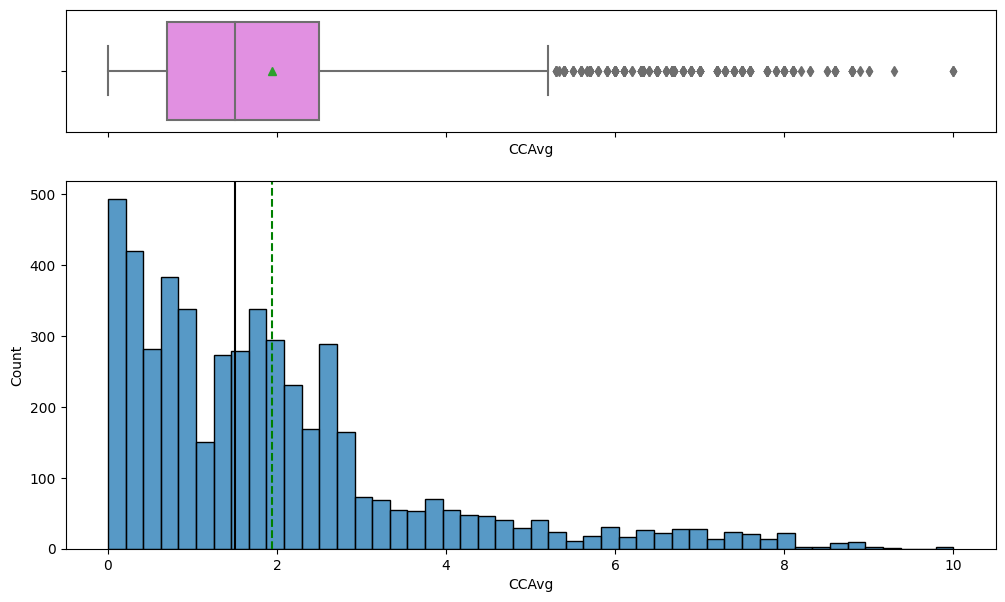

In [ ]:
# diagram depicting the distribution of CCAvg within the data set
histogram_boxplot(cdata, 'CCAvg')

CCAvg is also right-skewed and and contains many outliers. The outliers indicate that many customers spend more than the median and average value of participants within the sample data set.

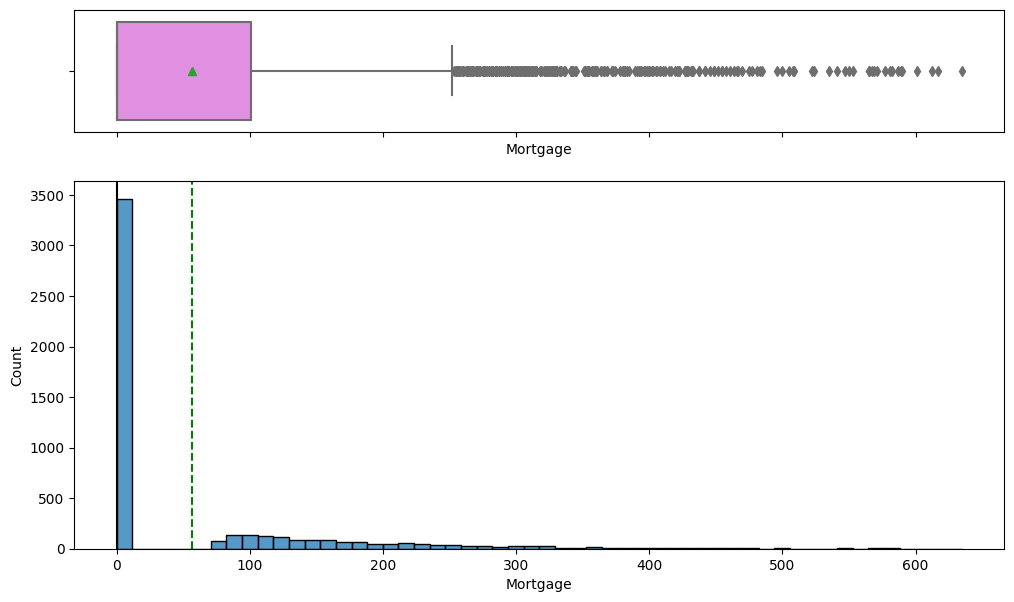

In [ ]:
# diagram depicting the distribution of morgages within the data set
histogram_boxplot(cdata, 'Mortgage')

Mortgage is also right-skewed as majority of clients have a small or zero mortgage, however, outliers have a mortgage of high value.

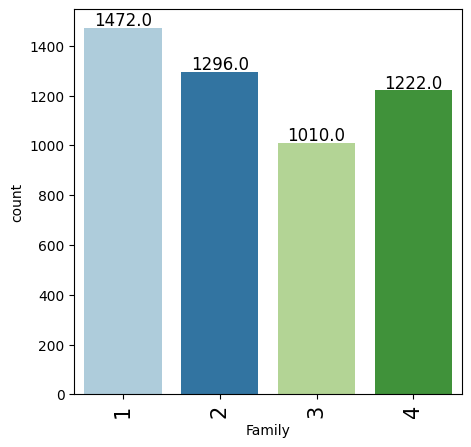

In [ ]:
# diagram depicting the distribution of family within the data set
labeled_barplot(cdata, 'Family')

Family size is also a column with right-skewed data, this indicates most clients are single or married couples.

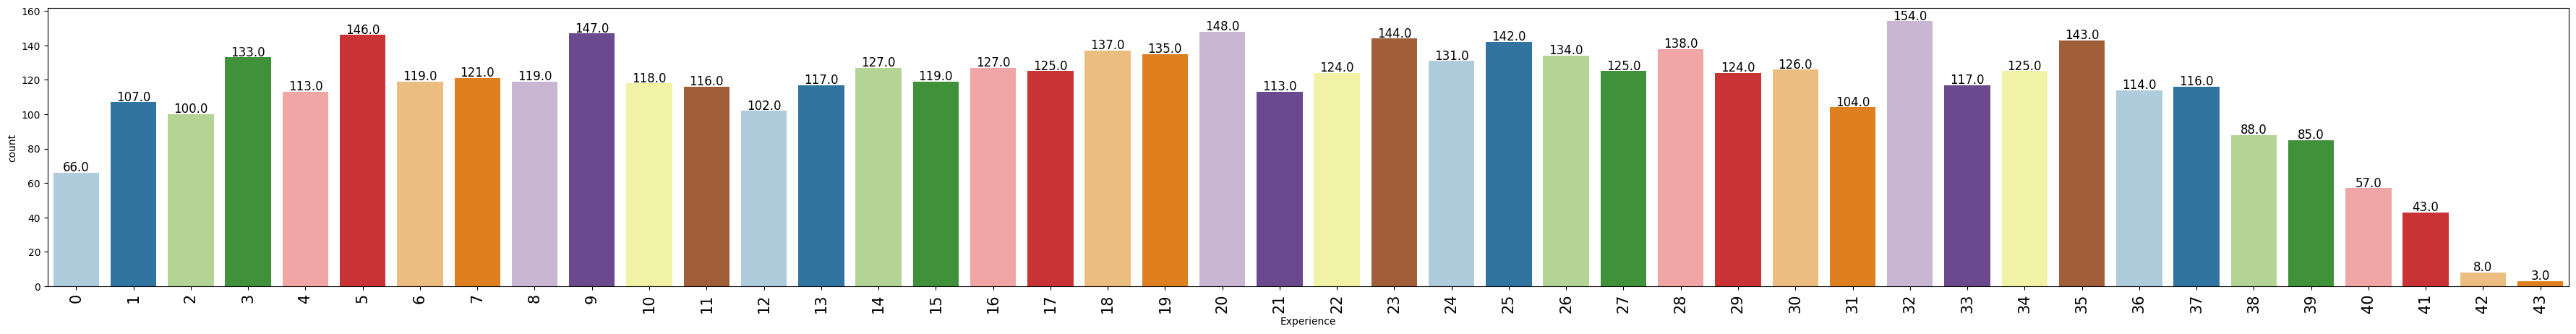

In [ ]:
# diagram depicting the distribution of education within the data set
labeled_barplot(cdata, 'Experience')

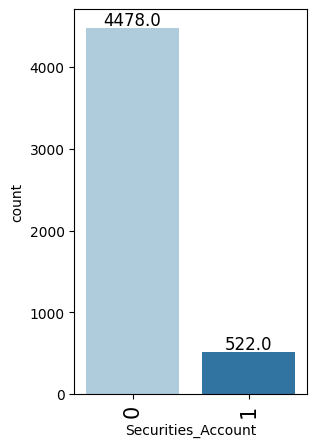

In [ ]:
# diagram depicting the distribution of securities_Account within the data set
labeled_barplot(cdata, 'Securities_Account')

4478 clients do not have a securities account with the bank.

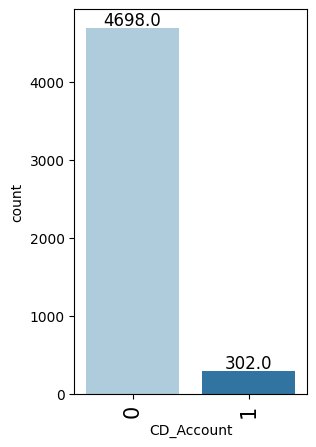

In [ ]:
# diagram depicting the distribution of CD_Account within the data set
labeled_barplot(cdata, 'CD_Account')

4698 clients do not have a CD account with the bank.

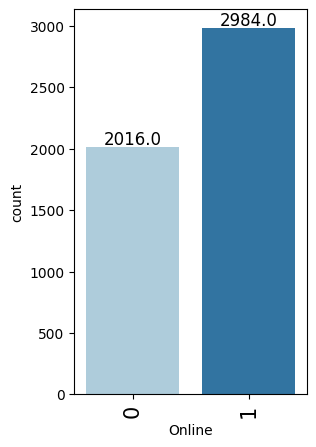

In [ ]:
# diagram depicting the distribution of online within the data set
labeled_barplot(cdata, 'Online')

2984 clients use online banking which may be through a mobile application or the banks website. These may also be younger clients who are more 'tech savvy'.

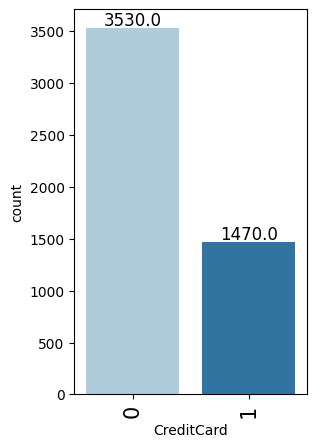

In [ ]:
# diagram depicting the distribution of CreditCard within the data set
labeled_barplot(cdata, 'CreditCard')

3530 clients do not use the banks credit facility.

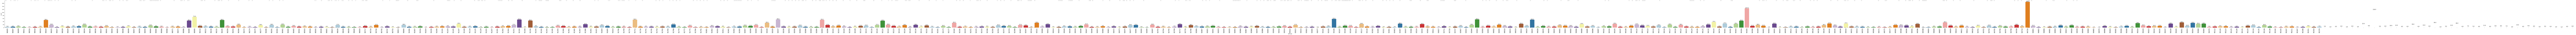

In [ ]:
# diagram depicting the distribution of ZipCode within the data set
labeled_barplot(cdata, 'ZIPCode')

ZipCode 94720, is the most common zip code. This may indicate that bank based in this area and hence has a large number of clients who live within a close vicinity to the bank. This may also be a result of, as we have seen before, there is a large number of clients (2016) who do not use the online platforms offered by banks and may have to physically go to the bank for any banking work they may have.  

In [ ]:
# Function for a stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

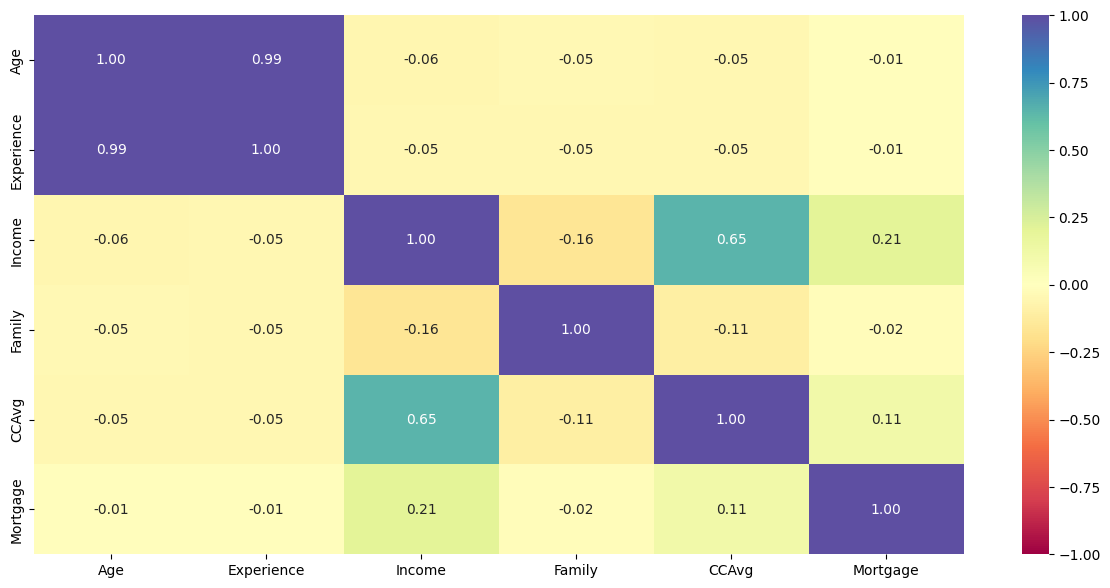

In [ ]:
# Correlation check using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cdata.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Age and Experience are highly correlated.
CCAvg and Income are also highly correlated.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


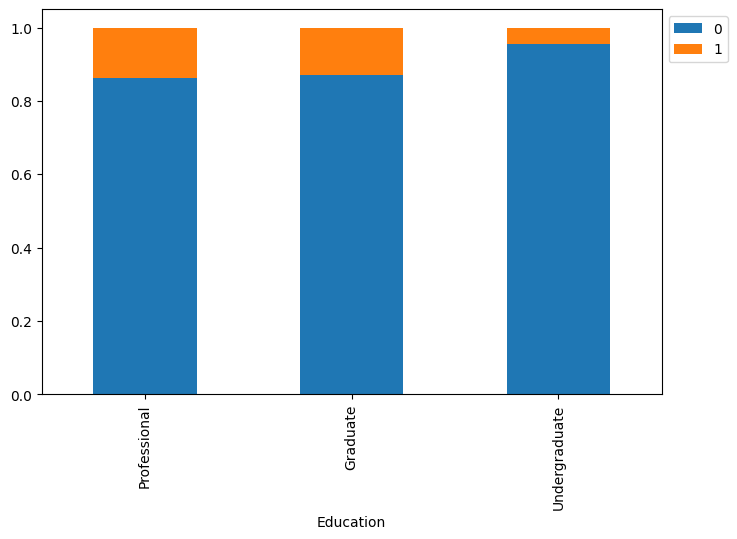

In [ ]:
# diagram depicting the correlation between a clients education and their interest in taking out a personal loan.
stacked_barplot(cdata, 'Education', 'Personal_Loan')

480 clients would take out a personal loan, 205 of them are professionals in the field of study. Undergraduates are the least likely to take out a personal loan with only 93 clients.

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


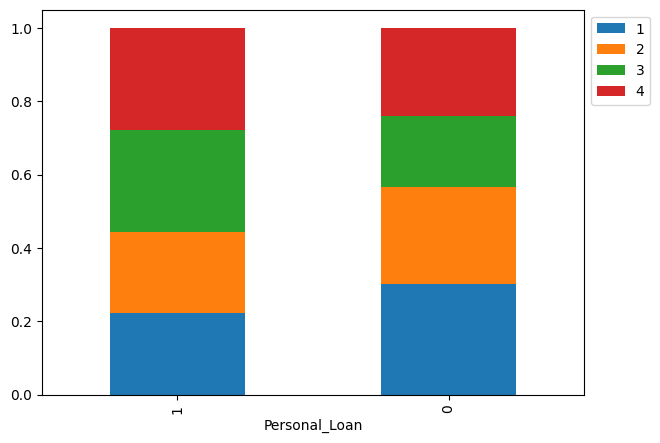

In [ ]:
# diagram depicting the correlation between a clients family size affects their interest in taking out a personal loan.
stacked_barplot(cdata, 'Personal_Loan', 'Family')

From the diagram we can deduce that as family sizes increase, clients are more likely to take out a personal loan. The number of clients who have taken out personal loans increases as families grow in size, only 107 single clients have taken out a personal loan compared to 134 clients who have a family size of 4.

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


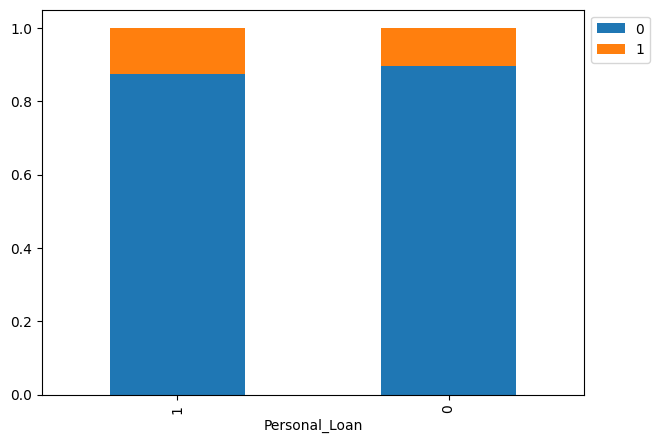

In [ ]:
# diagram depicting the correlation between a clients security account and their interest in taking out a personal loan.
stacked_barplot(cdata,  'Personal_Loan', 'Securities_Account')

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


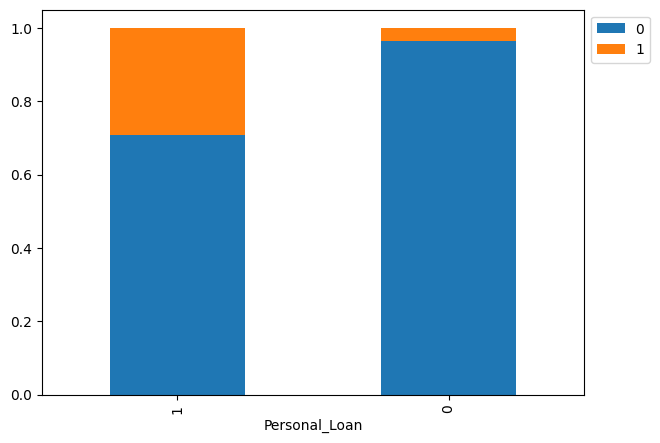

In [ ]:
# diagram depicting the correlation between a clients CD_account and their interest in taking out a personal loan.
stacked_barplot(cdata,  'Personal_Loan', 'CD_Account')

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


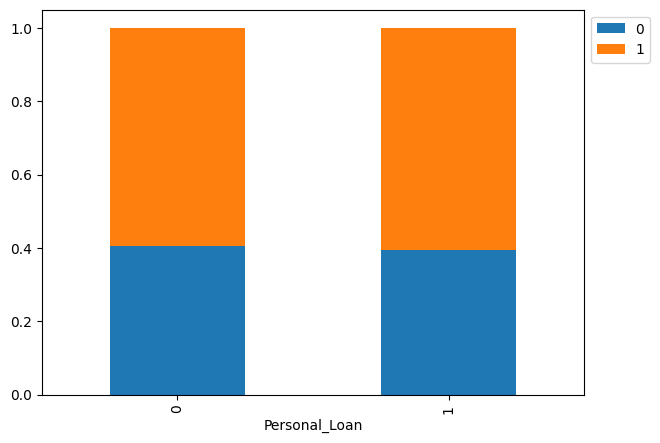

In [ ]:
# diagram depicting the correlation between a clients use of online facilities and their interest in taking out a personal loan.
stacked_barplot(cdata,  'Personal_Loan', 'Online')

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


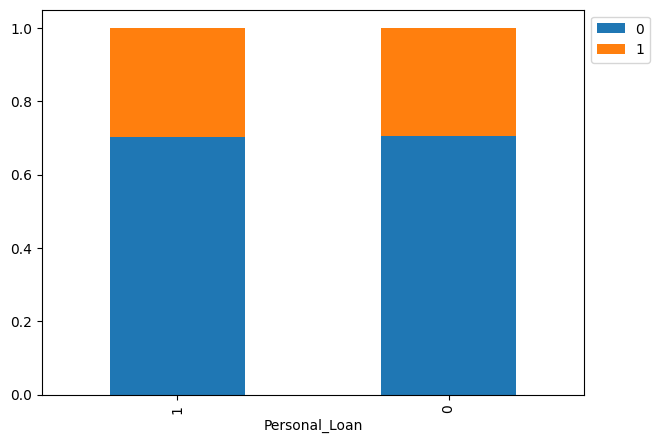

In [ ]:
# diagram depicting the correlation between a clients creditcard use and their interest in taking out a personal loan.
stacked_barplot(cdata,  'Personal_Loan', 'CreditCard')

ZIPCode        90005  90007  90009  90011  90016  90018  90019  90024  90025  \
Personal_Loan                                                                  
0                  5      6      8      3      1      4      4     49     17   
All                5      6      8      3      2      4      5     50     19   
1                  0      0      0      0      1      0      1      1      2   

ZIPCode        90027  90028  90029  90032  90033  90034  90035  90036  90037  \
Personal_Loan                                                                  
0                  2      7      5      7      9     19      6      7      4   
All                3      8      5      8      9     20      6      7      5   
1                  1      1      0      1      0      1      0      0      1   

ZIPCode        90041  90044  90045  90048  90049  90057  90058  90059  90064  \
Personal_Loan                                                                  
0                 10      2      3    

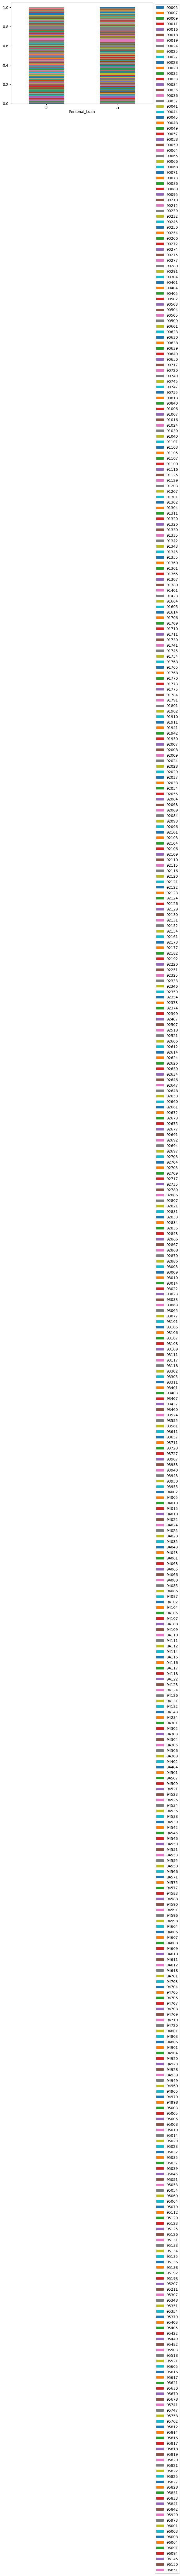

In [ ]:
# diagram depicting the correlation between a clients ZipCode and their interest in taking out a personal loan.
stacked_barplot(cdata,  'Personal_Loan', 'ZIPCode')

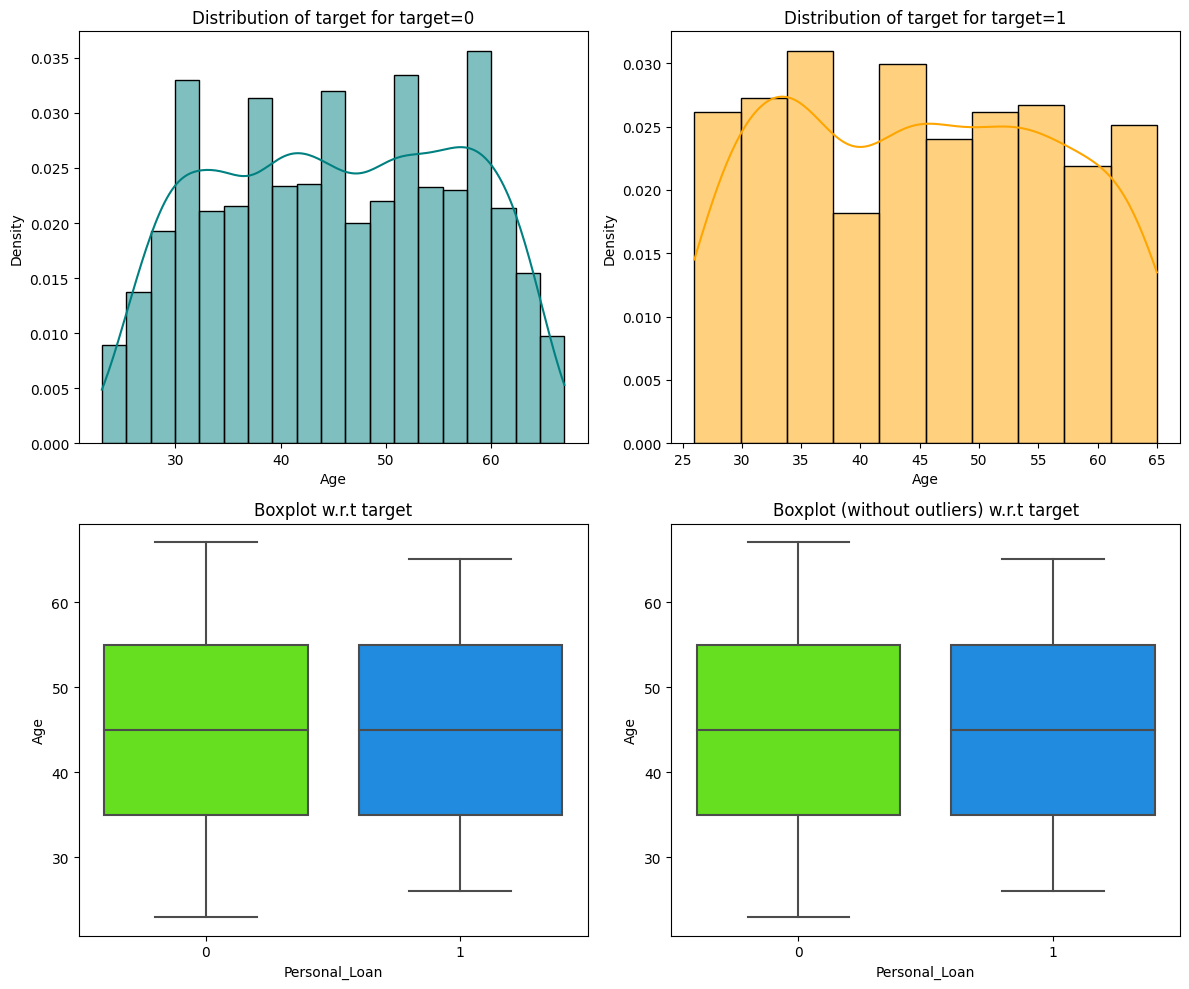

In [ ]:
# Checking the how age affects a clients wish to take out a personal loan
distribution_plot_wrt_target(cdata, "Age", "Personal_Loan")

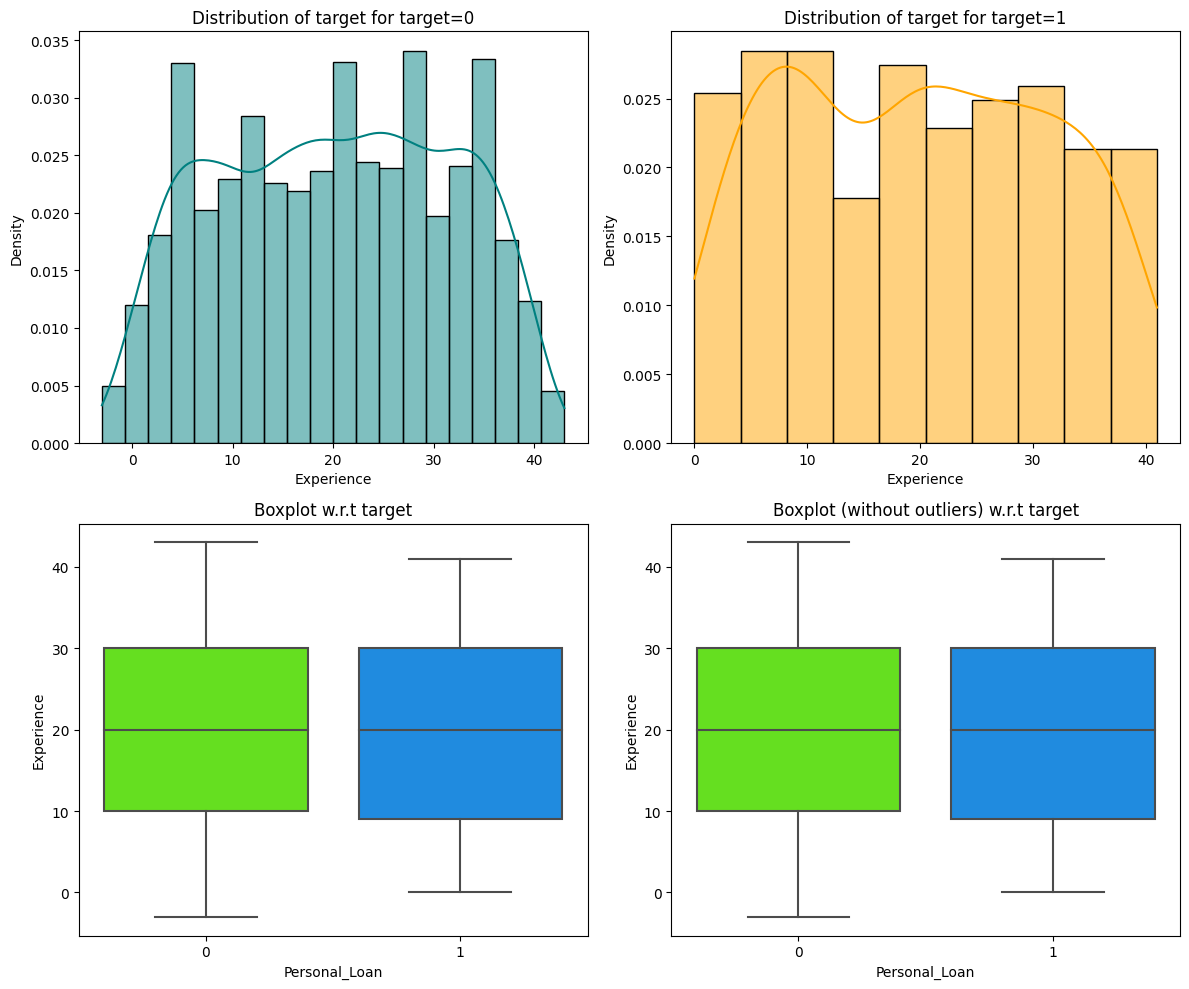

In [ ]:
# Checking the how experience affects a clients wish to take out a personal loan
distribution_plot_wrt_target(cdata, "Experience", "Personal_Loan")

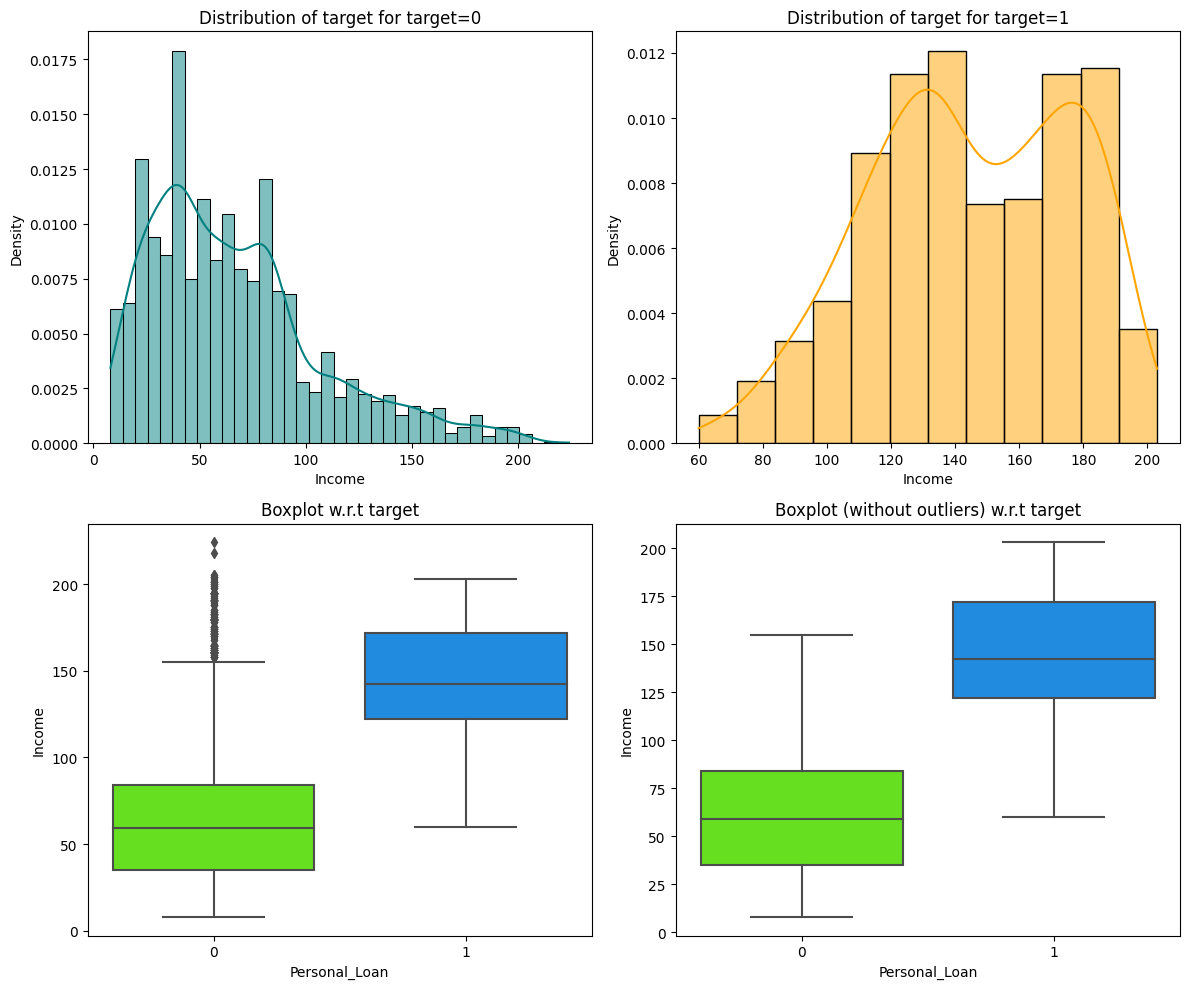

In [ ]:
# Checking the how Income affects a clients wish to take out a personal loan
distribution_plot_wrt_target(cdata, "Income", "Personal_Loan")

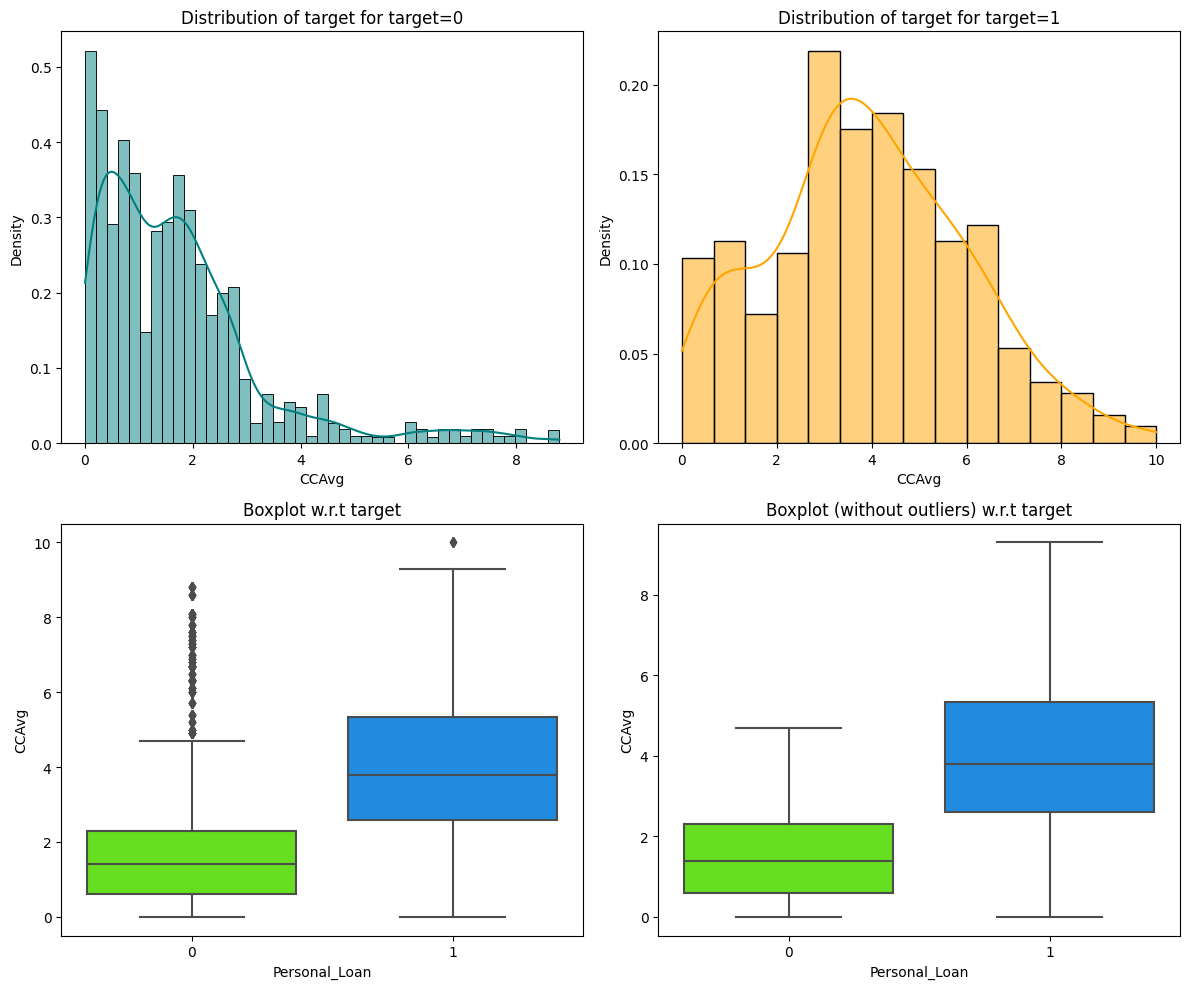

In [ ]:
# Checking the how CCAvg affects a clients wish to take out a personal loan
distribution_plot_wrt_target(cdata, "CCAvg", "Personal_Loan")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Finding any outliers
Q1 = cdata.quantile(.25)
Q3 = cdata.quantile(.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age                   0.00
CCAvg                 6.48
CD_Account            0.00
CreditCard            0.00
Education             0.00
Experience            0.00
Family                0.00
ID                    0.00
Income                1.92
Mortgage              5.82
Online                0.00
Personal_Loan         0.00
Securities_Account    0.00
ZIPCode               0.00
dtype: float64

In [ ]:
# identifying independent and dependent variable
X = cdata.drop(["Personal_Loan", "Experience"], axis=1)
Y = cdata["Personal_Loan"]

In [ ]:
# Creating dummy variables on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", y_train.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 477)
Shape of test set :  (3500,)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

* Predicting if a client will contribute to the revenue but may not contribute to revenue at all. - The loss of resources.

* Predciting if a customer will not contribute to revenue but in reality they would have. - Loss of opportunity.

* Recall should be maximised as the greater this value, the more chances we have of minimising the occurance of false negatives.


### Model Building: Logistic Regression

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Building the logistic regression model
lg = LogisticRegression(random_state=1)

## Complete the code to Fit the logistic Regression model on X_train and y_train
model = lg.fit(X_train, y_train)

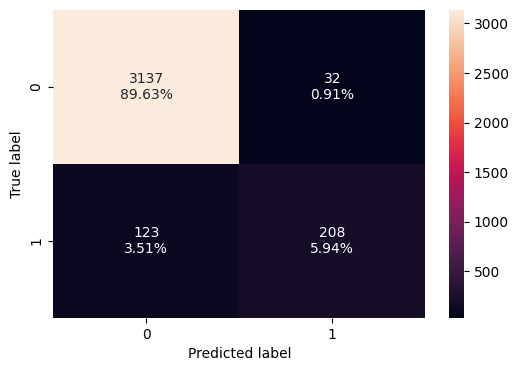

In [ ]:
# Checking the model performance
# creating a confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

True Positives (TP): we correctly predicted that 3137 clients will purchase a loan from the bank.

True Negatives (TN): we correctly predicted that 208 clients will not purchase a loan from the bank

False Positives (FP): we incorrectly predicted that 123 clients will purchase a loan from the bank.

False Negatives (FN): we incorrectly predicted that 32 clients will not purchase a loan from the bank.

In [ ]:
# Checking the model performance on training data set
# Model Performance on train
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.955714,0.628399,0.866667,0.728546


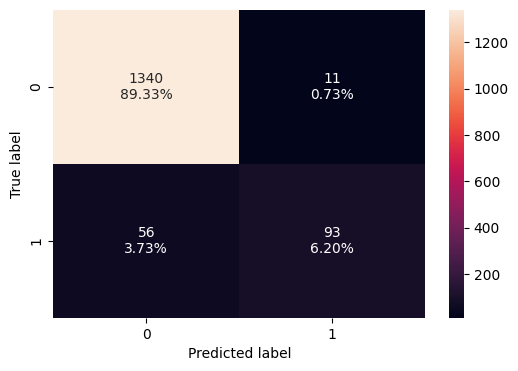

In [ ]:
# Checking the model performance on the test data set
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

True Positives (TP): we correctly predicted that 1340 clients will a purchase a loan from the bank.

True Negatives (TN): we correctly predicted that 93 clients will not purchase a loan from the bank.

False Positives (FP): we incorrectly predicted that 56 clients will purchase a loan from the bank.

False Negatives (FN): we incorrectly predicted that 11 clients will purchase a loan from the bank.

In [ ]:
# Checking the model performance on test data set
# Model Performance on test data
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.955333,0.624161,0.894231,0.735178


### Model Performance Improvement: Logistic Regression

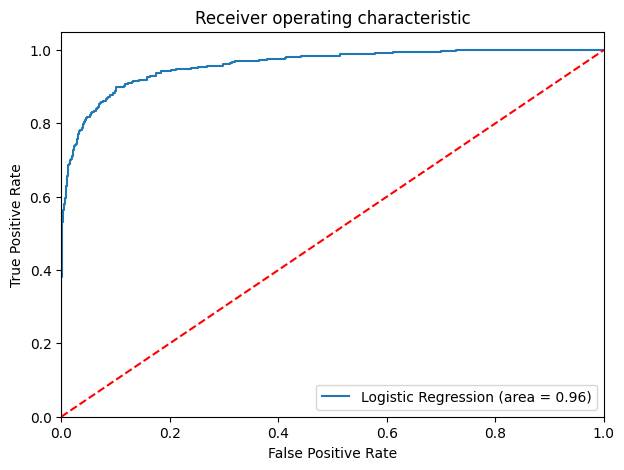

In [ ]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.12302429362714132


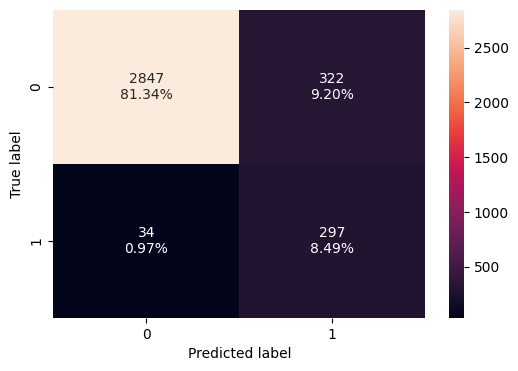

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.898286,0.897281,0.479806,0.625263


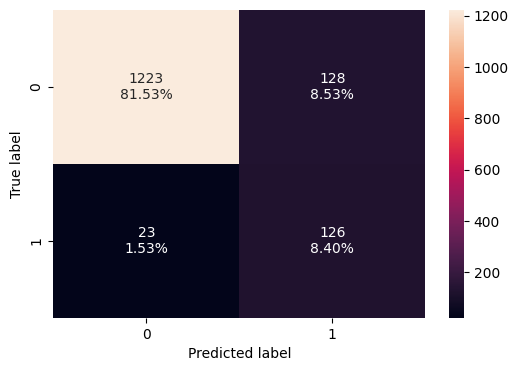

In [ ]:
# Confusion matrix with threshold for test data
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold = optimal_threshold_auc_roc)

In [ ]:
# Checking model performance on test data with threshold value
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold = optimal_threshold_auc_roc
)
print("Test Performance:")
log_reg_model_train_perf_threshold_auc_roc

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.899333,0.845638,0.496063,0.62531


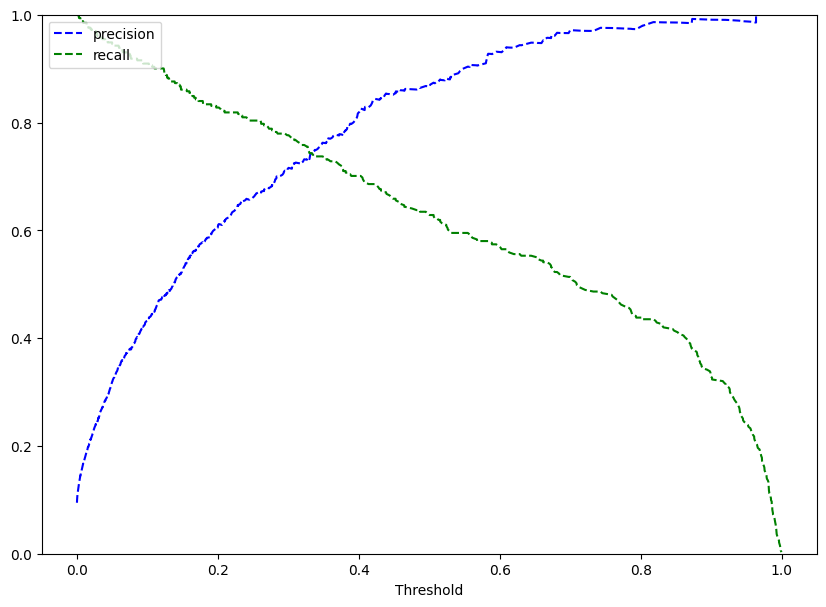

In [ ]:
# Precison-recall curve
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


# Plot recall precision curve
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting the threshold based on the above curve
optimal_threshold_curve = 0.845638

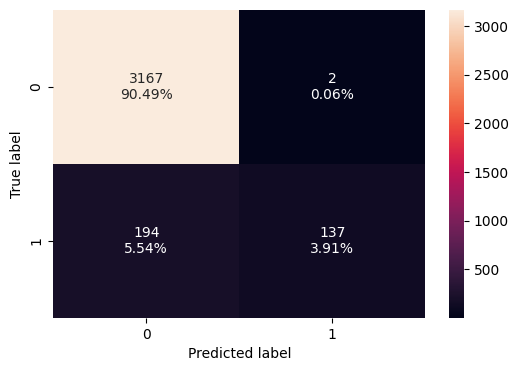

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold = optimal_threshold_curve)

In [ ]:
# Viewing the model performance
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944,0.413897,0.985612,0.582979


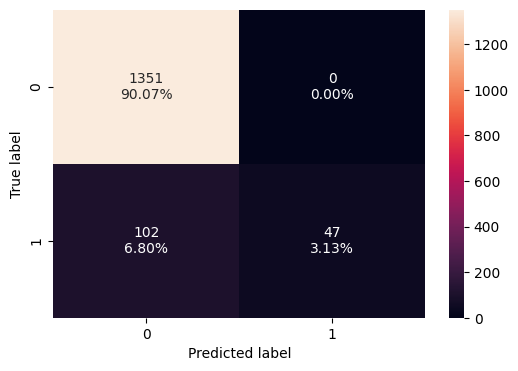

In [ ]:
# Confusion matrix for test data using treshold
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold = optimal_threshold_curve)

In [ ]:
# Model performance on test data
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold = optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.932,0.315436,1.0,0.479592


In [ ]:
# Model performance comparison
# training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-2 Threshold",
    "Logistic Regression-3 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-2 Threshold,Logistic Regression-3 Threshold
Accuracy,0.955714,0.899333,0.944000
Recall,0.628399,0.845638,0.413897
Precision,0.866667,0.496063,0.985612
F1,0.728546,0.625310,0.582979


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-2 Threshold",
    "Logistic Regression-23 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

NameError: ignored

Observations

### Model Building: Decision Tree

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Building the decision tree model
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

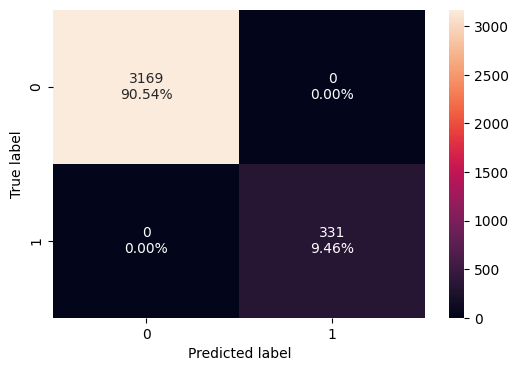

In [ ]:
# Checking performance on training data
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# Visual representation of tree
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_90007', 'ZIPCode_90009', 'ZIPCode_90011', 'ZIPCode_90016', 'ZIPCode_90018', 'ZIPCode_90019', 'ZIPCode_90024', 'ZIPCode_90025', 'ZIPCode_90027', 'ZIPCode_90028', 'ZIPCode_90029', 'ZIPCode_90032', 'ZIPCode_90033', 'ZIPCode_90034', 'ZIPCode_90035', 'ZIPCode_90036', 'ZIPCode_90037', 'ZIPCode_90041', 'ZIPCode_90044', 'ZIPCode_90045', 'ZIPCode_90048', 'ZIPCode_90049', 'ZIPCode_90057', 'ZIPCode_90058', 'ZIPCode_90059', 'ZIPCode_90064', 'ZIPCode_90065', 'ZIPCode_90066', 'ZIPCode_90068', 'ZIPCode_90071', 'ZIPCode_90073', 'ZIPCode_90086', 'ZIPCode_90089', 'ZIPCode_90095', 'ZIPCode_90210', 'ZIPCode_90212', 'ZIPCode_90230', 'ZIPCode_90232', 'ZIPCode_90245', 'ZIPCode_90250', 'ZIPCode_90254', 'ZIPCode_90266', 'ZIPCode_90272', 'ZIPCode_90274', 'ZIPCode_90275', 'ZIPCode_90277', 'ZIPCode_90280', 'ZIPCode_90291', 'ZIPCode_90304', 'ZIPCode_90401', 'ZIPCode_90404', 'ZIPCode_90405', 'ZIPCod

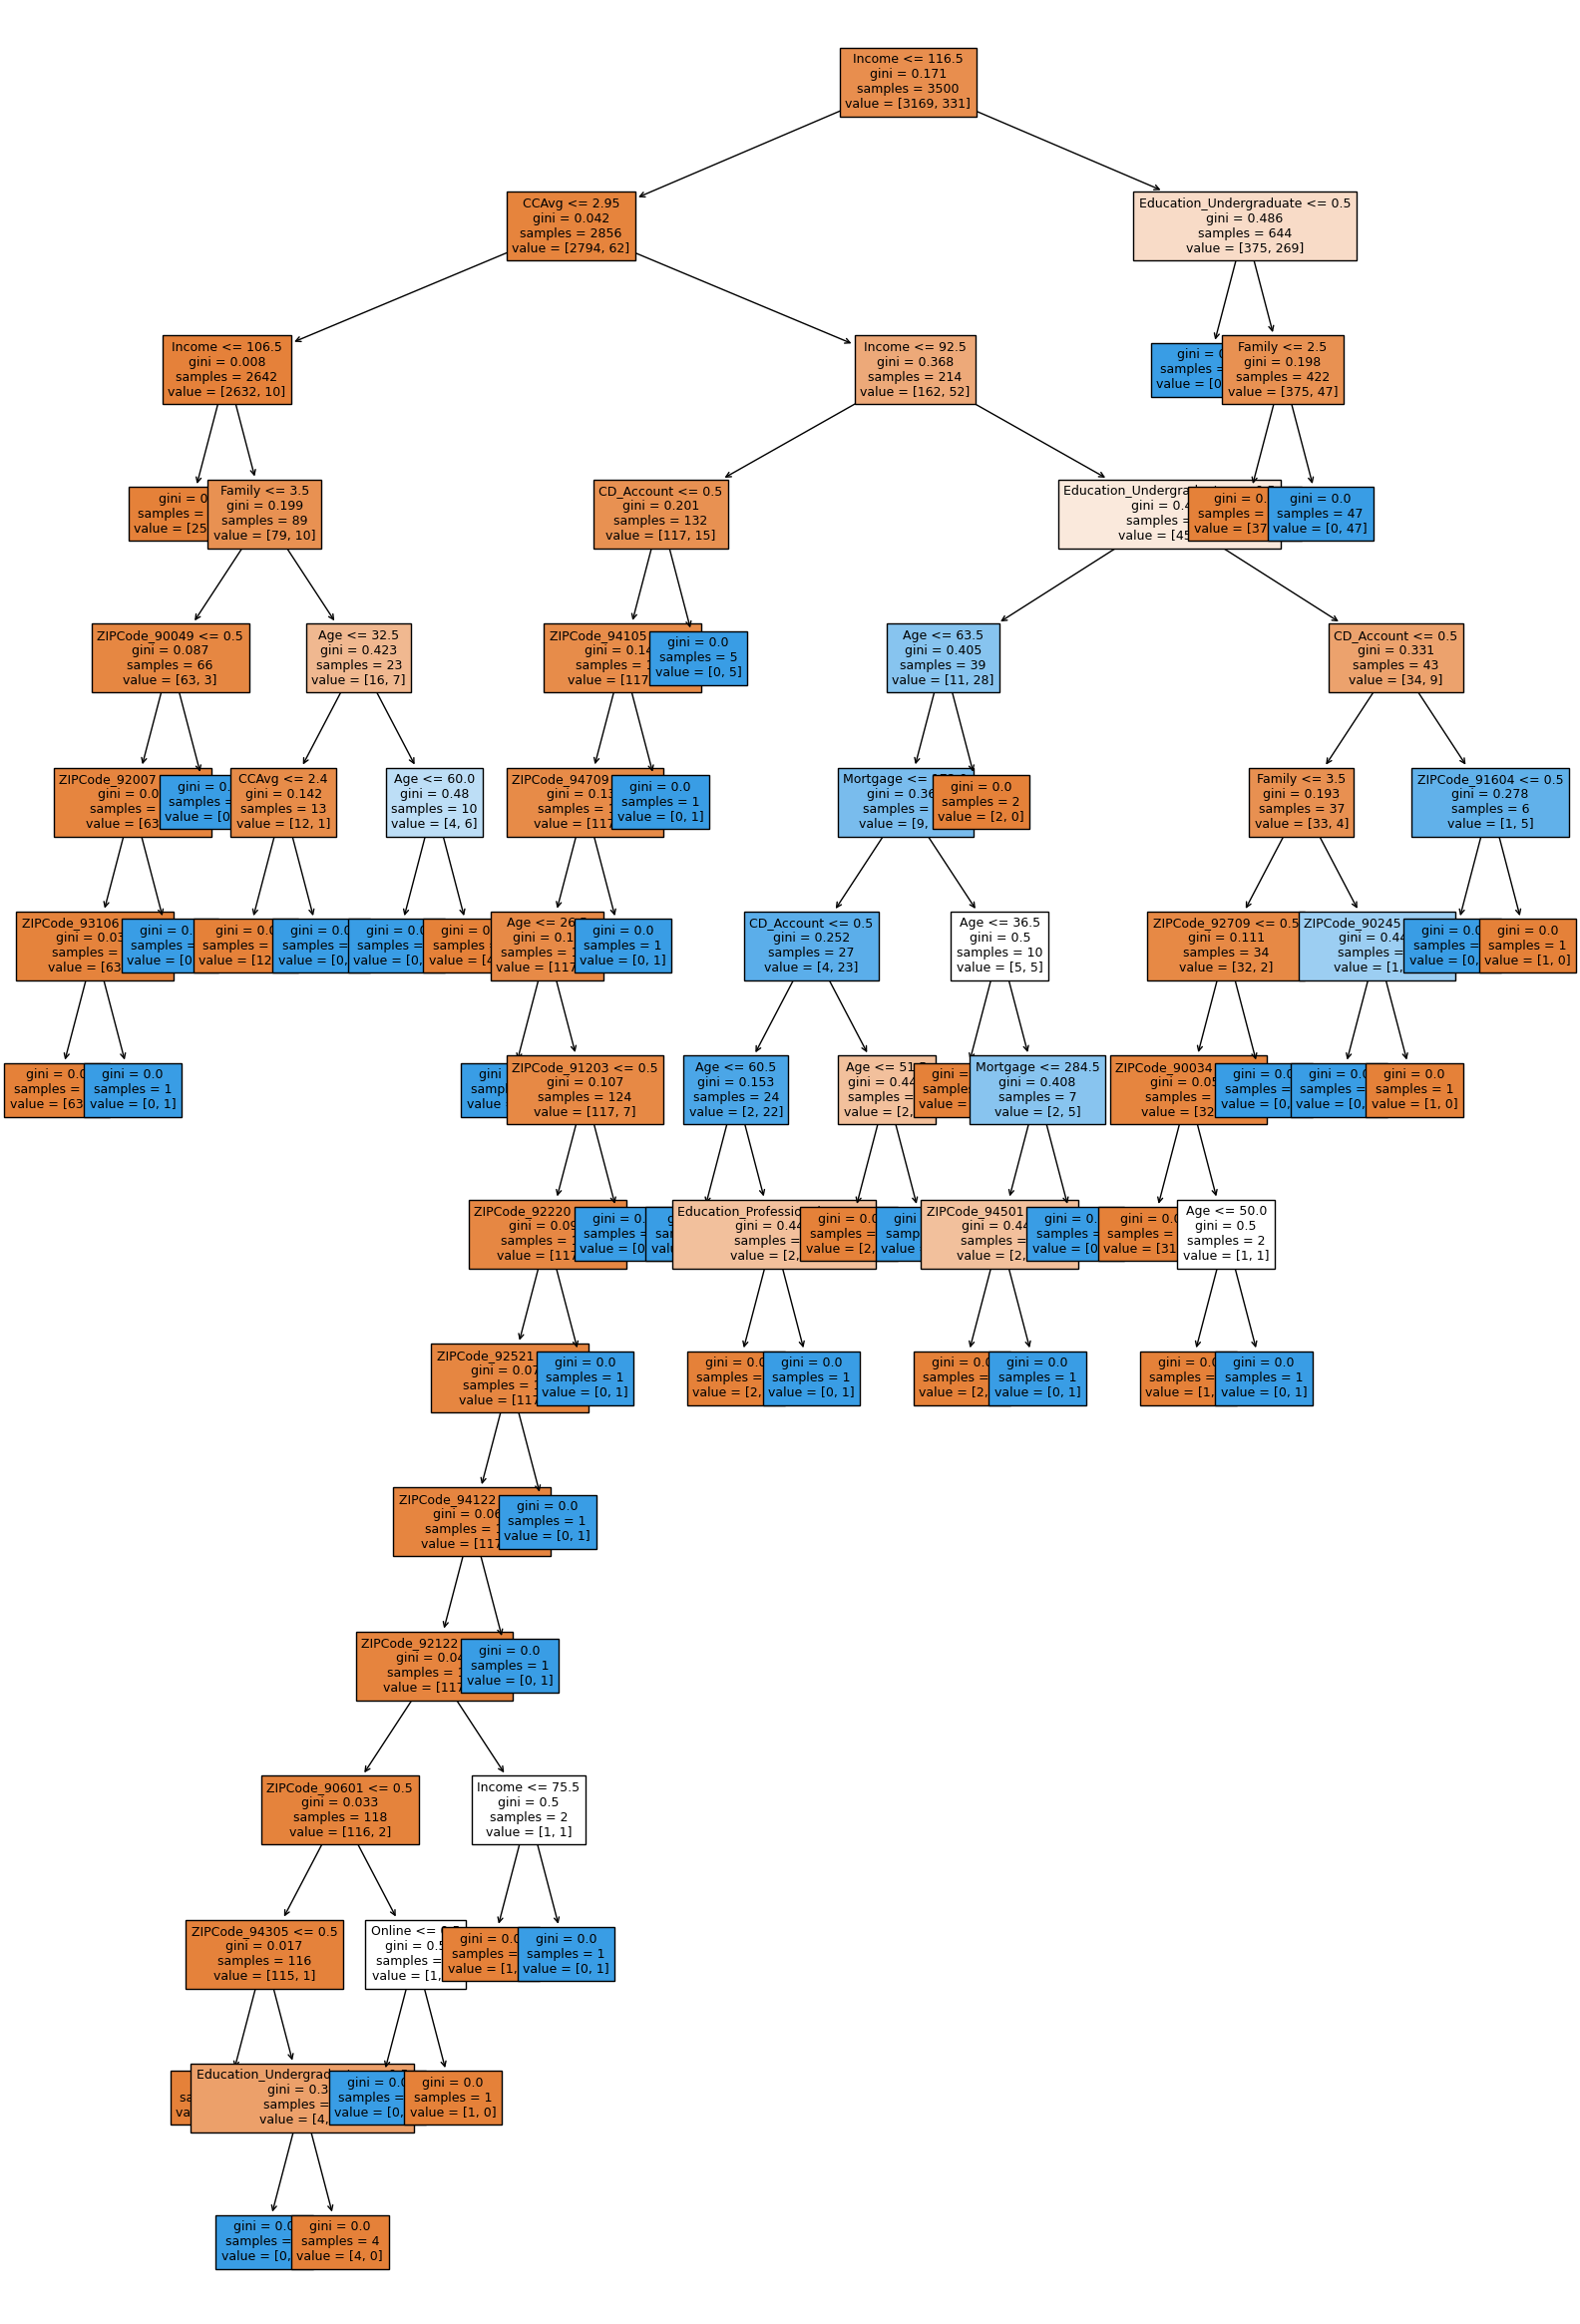

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |---

In [ ]:
# importance of features in the tree building
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403621
Income                   0.299484
Family                   0.146572
CCAvg                    0.040876
Age                      0.031102
...                           ...
ZIPCode_92109            0.000000
ZIPCode_92106            0.000000
ZIPCode_92104            0.000000
ZIPCode_92103            0.000000
ZIPCode_93009            0.000000

[477 rows x 1 columns]


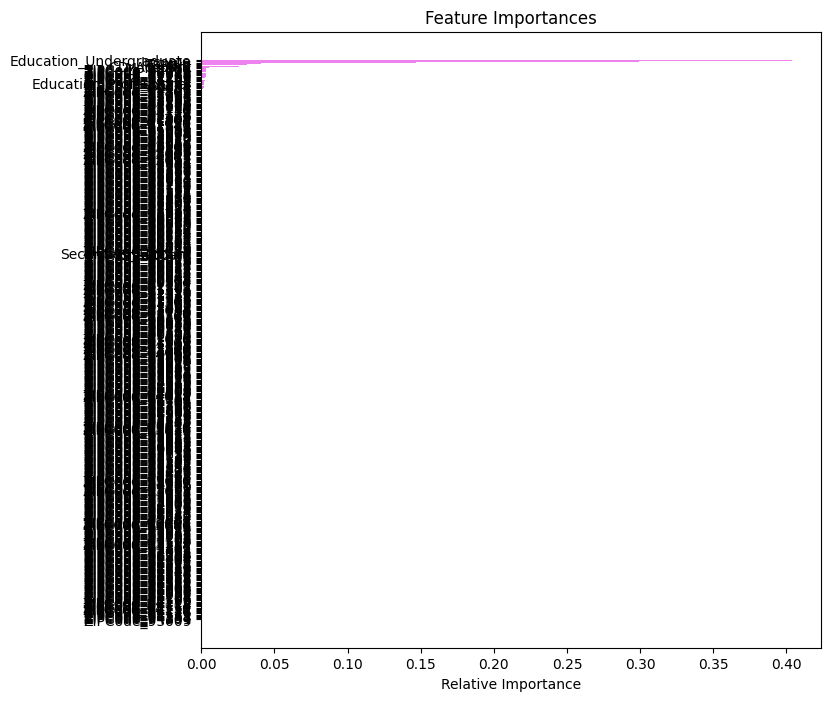

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

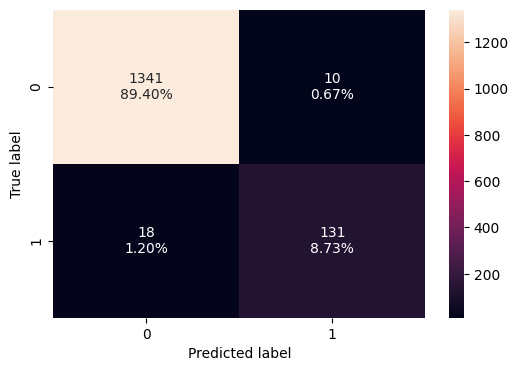

In [ ]:
# Model performance on test data
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.879195,0.929078,0.903448


### Model Performance Improvement: Decision Tree

In [ ]:
# Pre-pruning of the decison tree
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

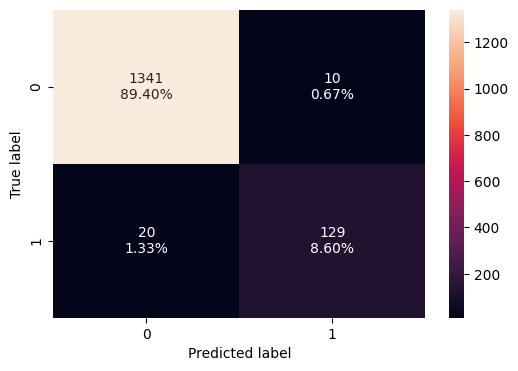

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


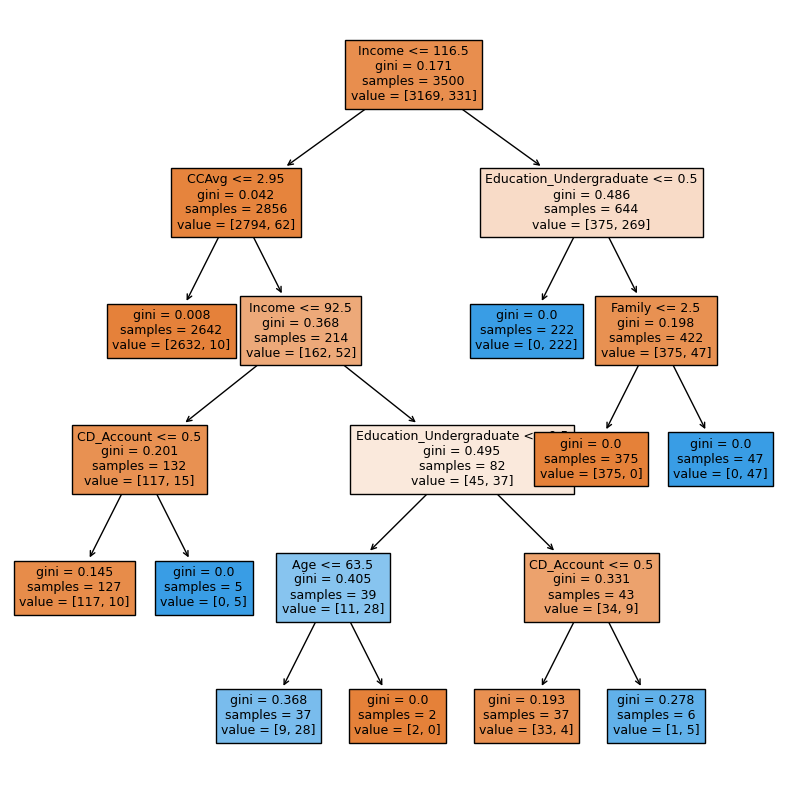

In [ ]:
# Visualising the Decision Tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [ ]:
# importance of features in the tree building
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403621
Income                   0.299484
Family                   0.146572
CCAvg                    0.040876
Age                      0.031102
...                           ...
ZIPCode_92109            0.000000
ZIPCode_92106            0.000000
ZIPCode_92104            0.000000
ZIPCode_92103            0.000000
ZIPCode_93009            0.000000

[477 rows x 1 columns]


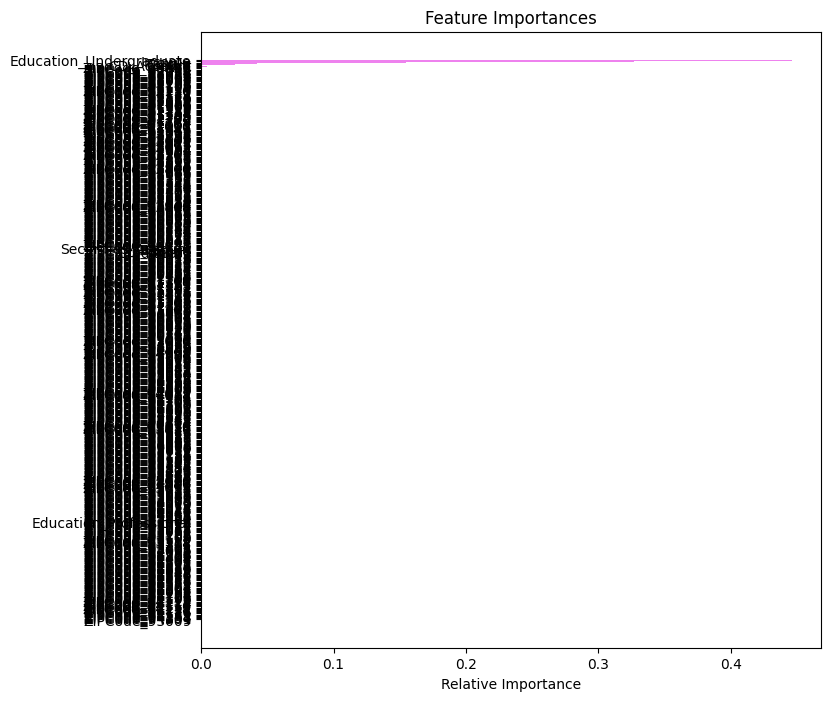

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

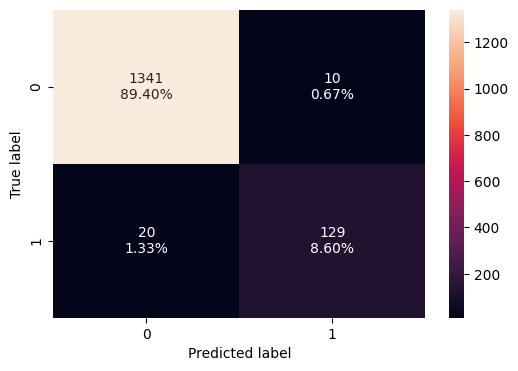

In [ ]:
# Measuring performance on test data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


In [ ]:
# Cost Complexity Pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000277,0.000554
2,0.000279,0.002226
3,0.000381,0.002606
4,0.000381,0.002987
5,0.000381,0.003368
6,0.000381,0.003749
7,0.000435,0.004185
8,0.000476,0.004661
9,0.000513,0.008254


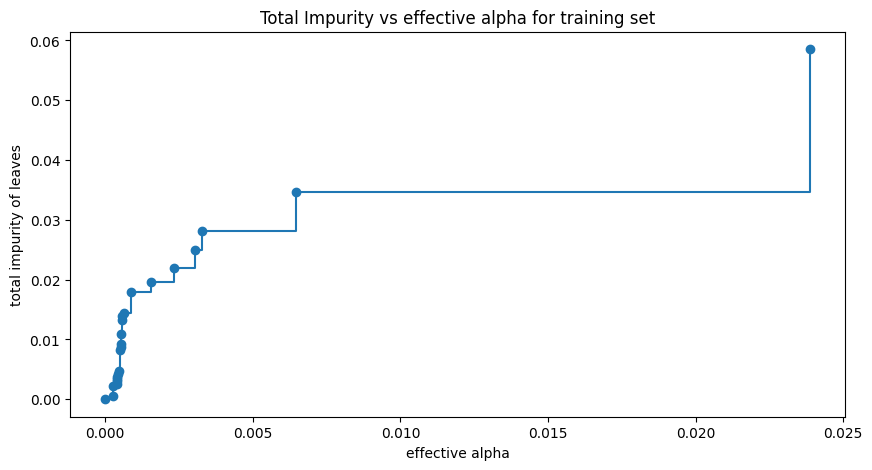

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


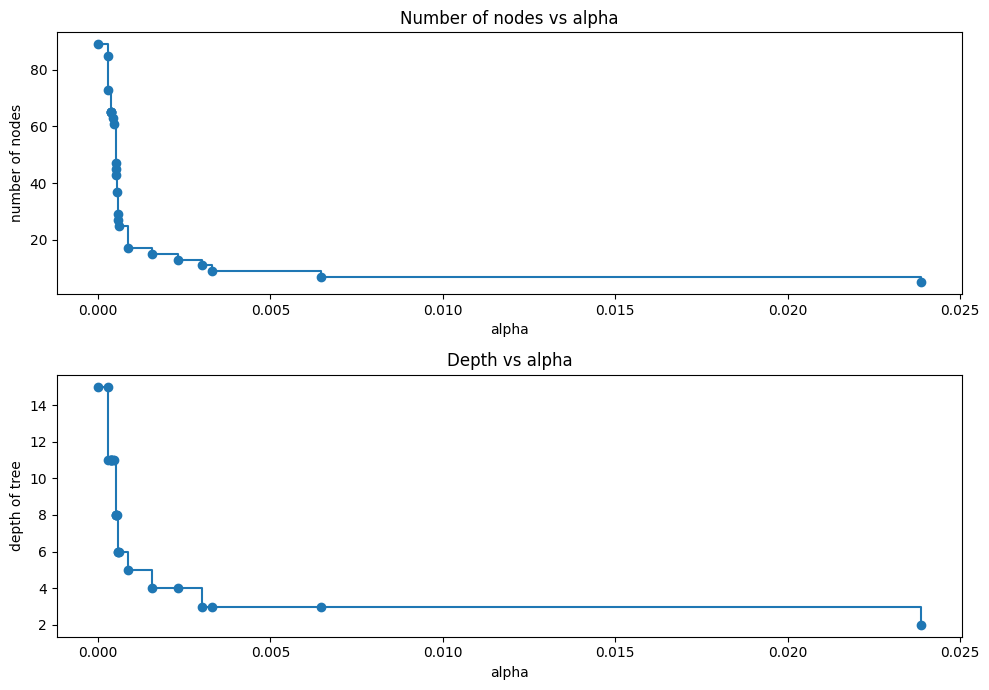

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Recall vs Alpha on train and test data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

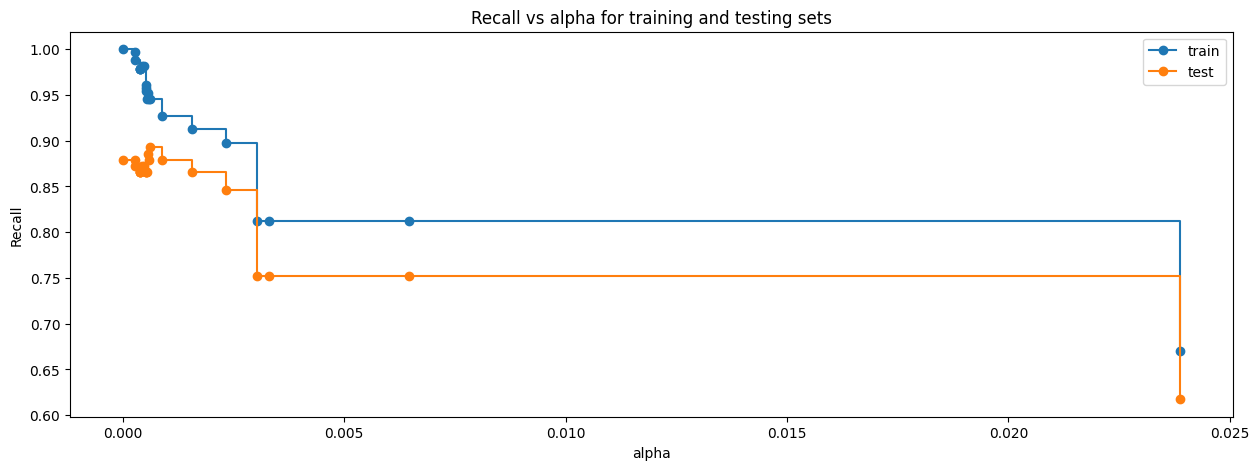

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.0,0.980000
Recall,1.0,0.865772
Precision,1.0,0.928058
F1,1.0,0.895833


In [ ]:
# Test data performance comparison
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.981333,0.980000
Recall,0.879195,0.865772
Precision,0.929078,0.928058
F1,0.903448,0.895833


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* Decision tree model derived from sklearn has the best recall score on the training data.

* The pre-pruned and post-pruned models are overfitting and are not as accurate as the sklearn model.


# Conclusions

* We analyzed the "Loan modelling" using different techniques and used Decision Tree Classifier to build a predictive model for the same.

* The model built can be used to predict if a client will take out a loan with the bank, which contributes to Revenue generation (by purchasing) or not.

* We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.

* We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.

* Undergrad education, income and family are the most important variables in predicting which clients will take out loans.

* We established the importance of hyper-parameters/ pruning to reduce overfitting.

# Recommendations

* In accordance with the decison tree model:

 a) We can recall that 0.88 clients will take out a loan with the bank, this will reduce the opportunity loss.

 b) A precison index of 0.93 indicates that clients there will be a slight loss of resources clients at 0.07 which may be a small number of clients who default on their loan repayments.

 c) The model is able to accurately identify 0.98 clients who would be ideal clients for taking out a loan. Employees may have to use their own discretion when interacting with a client.

* It is worth noting that when building the model we prioritise an undergraduate education as this provides security that a client may have been able to secure a job and will be able to repay the loan. 0.40 of the model is based of this field.

* Income is the next most dominant field used by the model in decison making at 0.30. This field is important as the bank takes reassurance of the client in their ability to repay the loan amount. This field relates to the precison score of the decision model.  

___